#SRISHTI'23 Tutorial 03 <br>

# Machine learning terms and metrics
Module Coordinator: Amit Pandey amit.pandey@research.iiit.ac.in <br>
<br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing. We will also explore how data augmentation affects accuracy.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [4]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-4-d89ecb46a347>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [5]:
type(dataset), dataset.DESCR

(sklearn.utils._bunch.Bunch,
 '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of 

In [6]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel



5,5
6,6
8,8


0,0

(0, 0)

We will also define a 'random classifier', which randomly allots labels to each sample

In [7]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [8]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [9]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [10]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?


In [ ]:
#1.0 using nearest neighbour
#0.164375808538163 using random classifier

In [12]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


In [14]:
A = 15
B = 16
C = 10

5,5 -A
6,6 -B
7,7 -C

8,8 - A | C
0,0 -B | A   - 0

10,10     -A
15,15     -C

(15, 5)

## Interesting: See how train accuracy of nearest neighbour is 1 i.e. 100%. Ponder and Explain.

In [ ]:
#nearest neighbour classifier has a of  overfitting the training data wwhen k is small
#if the k is small then perfect accuracy can be achieved
#if the training data is well separated it will accurately predict the labels of the training sample

For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [15]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [16]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [17]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [44]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.1/100)  # 99.9% for training, 0.1% for validation

valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)


Validation accuracy using nearest neighbour is  0.219895605729546
Validation accuracy using random classifier is  0.16332847778587037


In [45]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.1/100)  # 0.1% for training, 99.9% for validation

valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)


Validation accuracy using nearest neighbour is  0.2531100188118211
Validation accuracy using random classifier is  0.19430790703319376


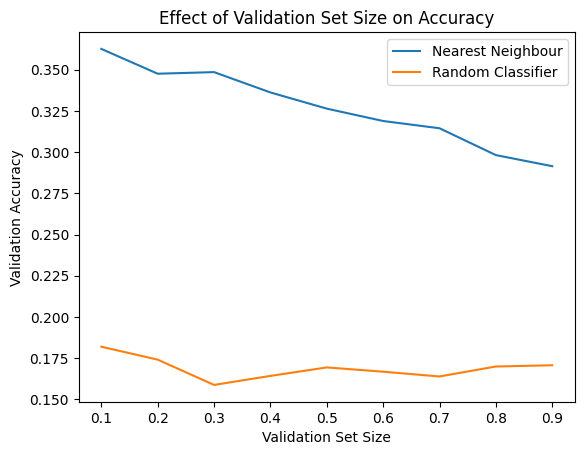

In [43]:
import matplotlib.pyplot as plt

# List to store validation accuracy values
validation_accuracy_nn = []
validation_accuracy_random = []

# Vary the validation set size
validation_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for validation_size in validation_sizes:
    # Split the data into training and validation sets
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 1 - validation_size)

    # Calculate validation accuracy for nearest neighbour
    valpred_nn = NN(traindata, trainlabel, valdata)
    val_accuracy_nn = Accuracy(vallabel, valpred_nn)
    validation_accuracy_nn.append(val_accuracy_nn)

    # Calculate validation accuracy for random classifier
    valpred_random = RandomClassifier(traindata, trainlabel, valdata)
    val_accuracy_random = Accuracy(vallabel, valpred_random)
    validation_accuracy_random.append(val_accuracy_random)

# Plot the validation accuracy
plt.plot(validation_sizes, validation_accuracy_nn, label='Nearest Neighbour')
plt.plot(validation_sizes, validation_accuracy_random, label='Random Classifier')
plt.xlabel('Validation Set Size')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Validation Set Size on Accuracy')
plt.legend()
plt.show()



In [ ]:
#1. the accuracy of the validation set decreases as we increase the validation set size and vice-versa

In [32]:
#2. If the training set is too small, the model may not have enough data to learn complex patterns in the data 
#and could result in underfitting.If the training set is too large, the model may memorize the training data
#instead of generalization leading to overfitting.In both cases, the model's performance on the validation set 
#may not accurately represent its performance on the test set.
#If the validation set is too small or not properly sampled from the same distribution as the test set,
#the accuracy measured on the validation set may not indicate the model's performance on the test set.The validation set
#should represent the characteristics and variety of the test set.

In [36]:
#3. 20% for validation set 
#if the given data set is large we can allocate even less than this to represent the sample
#if limited data set is given,it becomes important to strike a balance between having enough data for training
#and having a sufficient validation set for evaluating the model (20% may be allocated)
# If there is a highly complex problem, allocating a larger percentage (20%) for the validation set can be beneficial.
# This provides more data for evaluating model performance and tuning hyperparameters.

[0.16403402187120292]


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [18]:
#100 --- 80 --- 75|5.   12345, 1234|5. 2345|1, 1345|2


In [19]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [20]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [ ]:
#1.averaging the validation accuracy across multiple splits helps to smooth out the effects of random variations
# in the data and provides more consistent results
#2.does not necessarily guarantee a more accurate estimate of the test accuracy since the accuracy of the test 
#estimate ultimately depends on the quality of the validation data and its similarity to the test data
#3.The number of iterations in cross-validation affects the stability and precision of the estimate rather than
# directly improving its accuracy. With a higher number of iterations, the estimate tends to become more stable 
# providing a better assessment of the model's performance.
#4.Increasing the number of iterations in cross-validation cannot completely compensate for the limitations of a 
#very small train or validation dataset. While increasing iterations helps to reduce the impact of random variations 
#and provides a more stable estimate, it does not address the fundamental issue of having insufficient data for 
#learning and evaluation. It may help mitigate some variability but more representative data must be gathered 
#or other techniques such as data augmentation must be explored as a solution.

## Now let us see how augmentation affects accuracy. We will pick components from what we studied in the last module

we will experiment with MNIST dataset


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])



11490434/11490434 [==============================] - 0s 0us/step
(28, 28) 5


In [51]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [53]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [52]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [54]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.




In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [64]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

In [65]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.49157328 0.5297462  0.10262234 0.43363289 0.4478753  0.99771434
 0.04865317 0.31213893 0.49599527 0.84723535 0.46123712 0.29100645
 0.53526821 0.2970268  0.54832147 0.68986026 0.53078235 0.60963522
 0.03871744 0.65880008 0.96967539 0.49164475 0.80270823 0.54890534
 0.70399872 0.30991215 0.96686415 0.21514498 0.15909762 0.04552439
 0.54119056 0.61890091 0.64952197 0.17223148 0.65143709 0.16510656
 0.75499316 0.27524459 0.42204592 0.36722704 0.36772305 0.72094348
 0.99777292 0.52732975 0.40103889 0.29369911 0.62447823 0.45118322
 0.77283587 0.60668914]
angle with constraint is: [ -0.50560322   1.78477177 -23.84265969  -3.98202676  -3.12748189
  29.8628601  -27.08080959 -11.27166448  -0.24028391  20.83412072
  -2.3257731  -12.53961313   2.11609272 -12.17839174   2.89928835
  11.39161553   1.84694128   6.57811297 -27.6769535    9.52800477
  28.18052368  -0.50131475  18.16249394   2.93432042  12.23992342
 -11.40527073 

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [66]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-66-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.51801326 0.52520837 0.60730248 0.59454601 0.51907674 0.15511776
 0.02704316 0.5761848  0.42322    0.41011866 0.43006566 0.11354202
 0.17926796 0.66215444 0.51378147 0.60966233 0.12934062 0.81413962
 0.37263973 0.61307199 0.46565322 0.46832307 0.77858047 0.11034887
 0.07479022 0.1010583  0.99530014 0.92714813 0.70055348 0.44754581
 0.08507121 0.82089569 0.1894426  0.27284205 0.84079194 0.25733441
 0.84457649 0.78593856 0.83729024 0.6742912  0.35212582 0.65316787
 0.82910772 0.74941956 0.86202806 0.98353098 0.69014527 0.92812721
 0.27177781 0.97348274]
angle with constraint is: [ 0.18013259  0.25208368  1.07302484  0.94546011  0.19076743 -3.44882235
 -4.72956836  0.76184801 -0.76780001 -0.89881342 -0.69934343 -3.8645798
 -3.20732038  1.62154436  0.13781474  1.09662331 -3.70659377  3.14139622
 -1.27360274  1.13071988 -0.3434678  -0.31676929  2.7858047

In [67]:
#Accuracy after rotation augmentation constrained by  90  is  0.6467

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

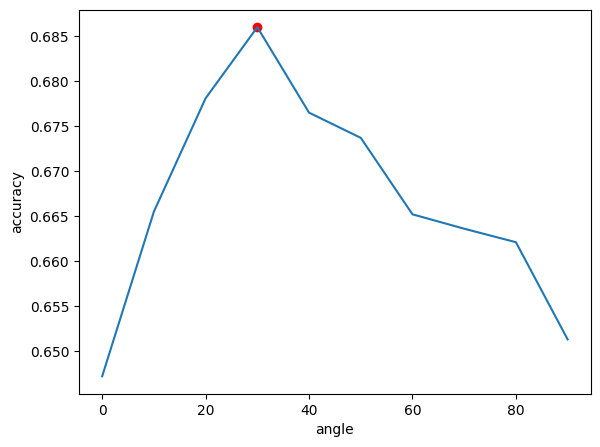

In [68]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us do a grid search to find the best shear constraint.

In [69]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-69-8a89fef4983d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6204
Accuracy after shear augmentation constrained by  0.4  is  0.6365
Accuracy after shear augmentation constrained by  0.6  is  0.6461
Accuracy after shear augmentation constrained by  0.8  is  0.6437
Accuracy after shear augmentation constrained by  1.0  is  0.6557
Accuracy after shear augmentation constrained by  1.2  is  0.6389
Accuracy after shear augmentation constrained by  1.4  is  0.6397
Accuracy after shear augmentation constrained by  1.6  is  0.6204
Accuracy after shear augmentation constrained by  1.8  is  0.603
Accuracy after shear augmentation constrained by  2.0  is  0.6026


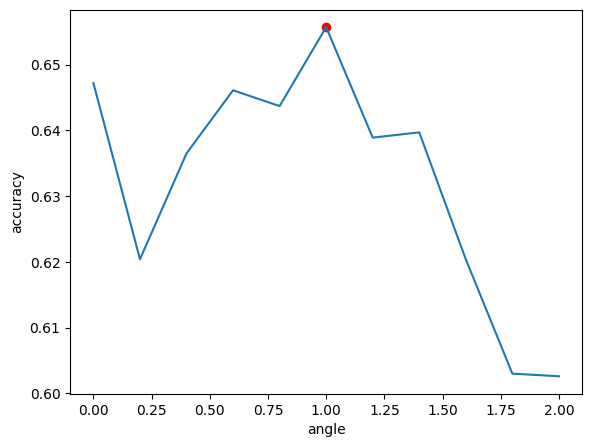

In [70]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [71]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters. 

In [74]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6003
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.5915
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.6058
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.5997
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.6031
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.5903
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.633
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.61
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5751
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.6001
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.6112
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6001
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.6227
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6334
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.603

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

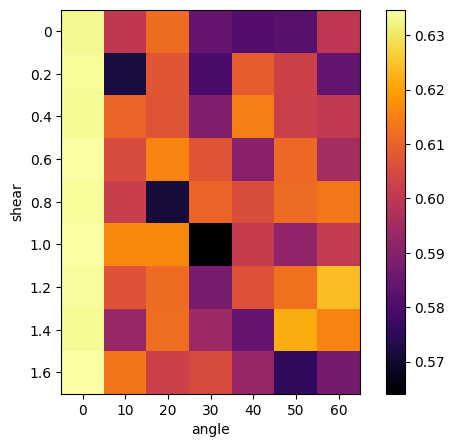

In [73]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno') 
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them. 
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch. 

In [ ]:
#1.Accuracy after augmentation shear: 0.6 angle: 0.0  is  0.6346
#accuracy was doubled
#2. Increasing the number of augmentations from each sample can potentially improve the accuracy by providing 
#more diverse training examples which can help it generalize better to unseen examples

Accuracy after custom augmentation: 0.5535


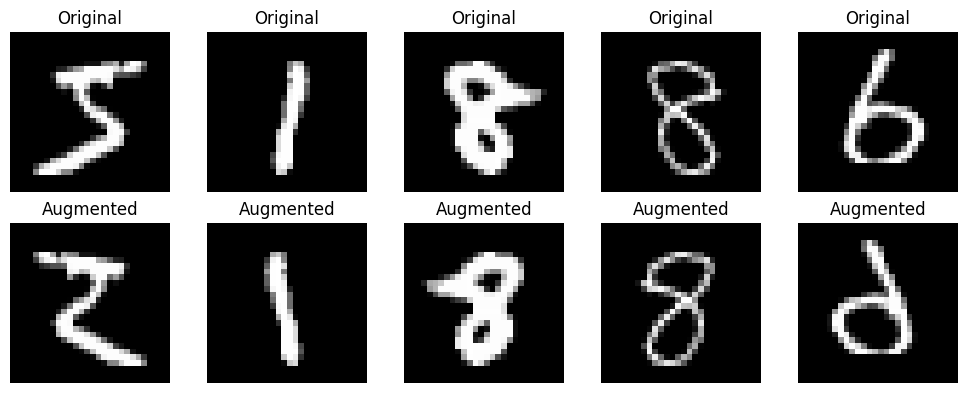

In [76]:
#3.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to perform custom augmentation
def custom_augmentation(images):
    augmented_images = []
    for image in images:
        # Example of a custom augmentation: horizontal flip
        augmented_image = np.flip(image, axis=1)
        augmented_images.append(augmented_image)
    
    return augmented_images

# Apply custom augmentation to training data
custom_augmented_data = custom_augmentation(train_X)

# Concatenate original and augmented data
augmented_train_X = np.concatenate((train_X, custom_augmented_data), axis=0)
augmented_train_y = np.concatenate((train_y, train_y), axis=0)

# Create and train the model with augmented data
model = KNeighborsClassifier()
model.fit(augmented_train_X.reshape(len(augmented_train_X), -1), augmented_train_y)

# Make predictions on test data
test_pred = model.predict(test_X.reshape(len(test_X), -1))

# Evaluate accuracy
accuracy = accuracy_score(test_y, test_pred)
print("Accuracy after custom augmentation:", accuracy)

# Visualize original and augmented images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i < 5:
        ax.imshow(train_X[i], cmap='gray')
        ax.set_title("Original")
    else:
        ax.imshow(custom_augmented_data[i-5], cmap='gray')
        ax.set_title("Augmented")
    ax.axis('off')
plt.tight_layout()
plt.show()


Accuracy after custom augmentation: 0.4201


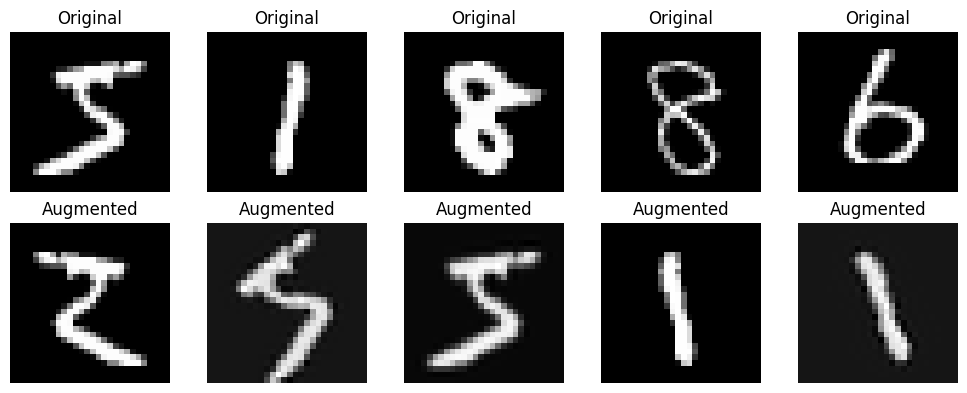

In [78]:
#4.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.ndimage import rotate
from scipy.ndimage import zoom
from skimage.transform import resize

# Function to perform custom augmentations
def custom_augmentation(images):
    augmented_images = []
    for image in images:
        # Apply horizontal flip
        augmented_image = np.flip(image, axis=1)
        
        # Apply rotation
        rotated_image = rotate(image, angle=30, reshape=False)
        
        # Apply zoom-in
        zoomed_image = zoom(image, zoom=1.2)
        
        augmented_images.extend([augmented_image, rotated_image, zoomed_image])
    
    return augmented_images

# Apply custom augmentation to training data
custom_augmented_data = custom_augmentation(train_X)

# Resize augmented images to the common size
resized_custom_augmented_data = []
for image in custom_augmented_data:
    resized_image = resize(image, train_X[0].shape, anti_aliasing=True)
    resized_custom_augmented_data.append(resized_image)

# Concatenate original and augmented data
augmented_train_X = np.concatenate((train_X, resized_custom_augmented_data), axis=0)
augmented_train_y = np.concatenate((train_y, train_y, train_y, train_y), axis=0)

# Create and train the model with augmented data
model = KNeighborsClassifier()
model.fit(augmented_train_X.reshape(len(augmented_train_X), -1), augmented_train_y)

# Make predictions on test data
test_pred = model.predict(test_X.reshape(len(test_X), -1))

# Evaluate accuracy
accuracy = accuracy_score(test_y, test_pred)
print("Accuracy after custom augmentation:", accuracy)

# Visualize original and augmented images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i < 5:
        ax.imshow(train_X[i], cmap='gray')
        ax.set_title("Original")
    else:
        ax.imshow(resized_custom_augmented_data[i-5], cmap='gray')
        ax.set_title("Augmented")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [79]:
# Define a list of training dataset sizes to test
training_dataset_sizes = [1000, 500, 200, 100, 50, 20, 10]

# Initialize a list to store the corresponding accuracies
accuracies = []

# Iterate over the training dataset sizes
for size in training_dataset_sizes:
    # Select a subset of the training data
    subset_train_X = augmented_train_X[:size]
    subset_train_y = augmented_train_y[:size]
    
    # Create and train the model with the subset of training data
    model = KNeighborsClassifier()
    model.fit(subset_train_X.reshape(len(subset_train_X), -1), subset_train_y)
    
    # Make predictions on test data
    test_pred = model.predict(test_X.reshape(len(test_X), -1))
    
    # Evaluate accuracy and store it
    accuracy = accuracy_score(test_y, test_pred)
    accuracies.append(accuracy)

# Find the smallest training dataset size that achieves accuracy above 50%
smallest_size_above_50 = None
for i, accuracy in enumerate(accuracies):
    if accuracy > 0.5:
        smallest_size_above_50 = training_dataset_sizes[i]
        break

print("Smallest training dataset size that achieves accuracy above 50%:", smallest_size_above_50)


Smallest training dataset size that achieves accuracy above 50%: 100
